# Secure Processor Microarchitecture (CS6630) 

---


## Assignment 2: Key Recovery attacks


*Authors: Surya Prasad S (EE19B121), Sai Dheeraj Ettamsetty (CS18B055)*

**About the assignment:** To recover the roundkeys for some rounds of Clefia-128 and whitened roundkeys for some other rounds and show the confidence of each key

## Preliminary code

In [ ]:
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.1 MB/s 
time: 919 µs (started: 2022-09-06 15:38:05 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 18.9 s (started: 2022-09-06 15:38:54 +00:00)


The T-tables defined below are based on our implementation of Clefia-128 and this gives very good and distinguishable results. Totally 8 T-tables are used and each takes a byte input and gives 4-byte output which we use as the intermediate output. 

In [ ]:
def t_table(tno, input):
    T_00 = [
    0x57ae41ef, 0x499239ab, 0xd1bf63dc, 0xc6913fae, 0x2f5ebce2, 0x3366ccaa, 0x74e8cd25, 0xfbebcb20,
    0x95376e59, 0x6ddaa973, 0x8219322b, 0xeac98f46, 0x0e1c3824, 0xb07dfa87, 0xa84d9ad7, 0x1c387048,
    0x2850a0f0, 0xd0bd67da, 0x4b9631a7, 0x9239724b, 0x5cb86dd5, 0xeec19f5e, 0x85172e39, 0xb17ffe81,
    0xc49537a2, 0x0a14283c, 0x76ecc529, 0x3d7af48e, 0x63c69157, 0xf9efc32c, 0x172e5c72, 0xaf4386c5,
    0xbf63c6a5, 0xa15fbee1, 0x19326456, 0x65ca8943, 0xf7f3fb08, 0x7af4f501, 0x3264c8ac, 0x204080c0,
    0x060c1814, 0xce811f9e, 0xe4d5b762, 0x831b362d, 0x9d274e69, 0x5bb671c7, 0x4c982db5, 0xd8ad47ea,
    0x42841591, 0x5dba69d3, 0x2e5cb8e4, 0xe8cd874a, 0xd4b577c2, 0x9b2b567d, 0x0f1e3c22, 0x13264c6a,
    0x3c78f088, 0x890f1e11, 0x67ce814f, 0xc09d27ba, 0x71e2d93b, 0xaa4992db, 0xb671e293, 0xf5f7f304,
    0xa455aaff, 0xbe61c2a3, 0xfde7d334, 0x8c050a0f, 0x1224486c, 0x00000000, 0x97336655, 0xdaa94fe6,
    0x78f0fd0d, 0xe1dfa37c, 0xcf831b98, 0x6bd6b167, 0x3972e496, 0x43861197, 0x55aa49e3, 0x264c98d4,
    0x3060c0a0, 0x982d5a77, 0xcc851792, 0xdda753f4, 0xebcb8b40, 0x54a84de5, 0xb37bf68d, 0x8f030605,
    0x4e9c25b9, 0x162c5874, 0xfae9cf26, 0x224488cc, 0xa557aef9, 0x77eec12f, 0x09122436, 0x61c2995b,
    0xd6b17fce, 0x2a54a8fc, 0x53a651f7, 0x376edcb2, 0x458a0983, 0xc19f23bc, 0x6cd8ad75, 0xae4182c3,
    0xefc39b58, 0x70e0dd3d, 0x08102030, 0x992f5e71, 0x8b0b161d, 0x1d3a744e, 0xf2f9ef16, 0xb475ea9f,
    0xe9cf834c, 0xc7933ba8, 0x9f234665, 0x4a9435a1, 0x3162c4a6, 0x254a94de, 0xfee1df3e, 0x7cf8ed15,
    0xd3bb6bd0, 0xa259b2eb, 0xbd67cea9, 0x56ac45e9, 0x14285078, 0x880d1a17, 0x60c09d5d, 0x0b162c3a,
    0xcd871394, 0xe2d9af76, 0x3468d0b8, 0x50a05dfd, 0x9e214263, 0xdca557f2, 0x11224466, 0x050a141e,
    0x2b56acfa, 0xb773e695, 0xa94f9ed1, 0x48903dad, 0xffe3db38, 0x66cc8549, 0x8a09121b, 0x73e6d137,
    0x03060c0a, 0x75eac923, 0x86112233, 0xf1ffe31c, 0x6ad4b561, 0xa753a6f5, 0x40801d9d, 0xc2992fb6,
    0xb96fdeb1, 0x2c58b0e8, 0xdbab4be0, 0x1f3e7c42, 0x58b07dcd, 0x94356a5f, 0x3e7cf884, 0xedc79354,
    0xfce5d732, 0x1b366c5a, 0xa05dbae7, 0x04081018, 0xb86ddab7, 0x8d070e09, 0xe6d1bf6e, 0x59b279cb,
    0x62c49551, 0x933b764d, 0x356ad4be, 0x7efce519, 0xca890f86, 0x214284c6, 0xdfa35bf8, 0x478e018f,
    0x152a547e, 0xf3fbeb10, 0xba69d2bb, 0x7ffee11f, 0xa651a2f3, 0x69d2b96b, 0xc88d078a, 0x4d9a29b3,
    0x87132635, 0x3b76ec9a, 0x9c254a6f, 0x01020406, 0xe0dda77a, 0xdea15ffe, 0x244890d8, 0x52a455f1,
    0x7bf6f107, 0x0c183028, 0x68d0bd6d, 0x1e3c7844, 0x801d3a27, 0xb279f28b, 0x5ab475c1, 0xe7d3bb68,
    0xad478ec9, 0xd5b773c4, 0x23468cca, 0xf4f5f702, 0x468c0589, 0x3f7efc82, 0x913f7e41, 0xc98f038c,
    0x6edca579, 0x84152a3f, 0x72e4d531, 0xbb6bd6bd, 0x0d1a342e, 0x18306050, 0xd9af43ec, 0x96316253,
    0xf0fde71a, 0x5fbe61df, 0x4182199b, 0xac458acf, 0x274e9cd2, 0xc59733a4, 0xe3dbab70, 0x3a74e89c,
    0x811f3e21, 0x6fdea17f, 0x070e1c12, 0xa35bb6ed, 0x79f2f90b, 0xf6f1ff0e, 0x2d5ab4ee, 0x3870e090,
    0x1a34685c, 0x44880d85, 0x5ebc65d9, 0xb577ee99, 0xd2b96fd6, 0xecc59752, 0xcb8b0b80, 0x903d7a47,
    0x9a29527b, 0x366cd8b4, 0xe5d7b364, 0x2952a4f6, 0xc39b2bb0, 0x4f9e21bf, 0xab4b96dd, 0x64c88d45,
    0x51a259fb, 0xf8edc72a, 0x10204060, 0xd7b37bc8, 0xbc65caaf, 0x0204080c, 0x7dfae913, 0x8e010203]

    T_01 = [
    0xd86c75ad, 0xa9dae64f, 0x9bc3b02b, 0xcfe94c83, 0x9c4eb925, 0x279d694e, 0x140a3c28, 0x7a3d8ef4,
    0x6db8b7da, 0x6c36b4d8, 0x75b49fea, 0x703890e0, 0x26136a4c, 0x6834b8d0, 0x180c2830, 0xafd9ec43,
    0x63bfa5c6, 0xe87425cd, 0x35945f6a, 0x038f0506, 0x73b795e6, 0x259c6f4a, 0xd7e564b3, 0xa5dcf257,
    0x219e6342, 0x0e07121c, 0x9249ab39, 0x9e4fbf21, 0x2d98775a, 0x582ce8b0, 0x7db087fa, 0x3b934d76,
    0x24126c48, 0xcbeb408b, 0x87cd9413, 0x7bb38df6, 0x39924b72, 0xd3e768bb, 0x82419b19, 0xc0605d9d,
    0xdbe370ab, 0x4221c684, 0x4e27d29c, 0x763b9aec, 0xd1e66ebf, 0x32195664, 0xb9d2d66f, 0x1c0e2438,
    0x3f91417e, 0x22116644, 0x93c7a83b, 0x7e3f82fc, 0x542afca8, 0x018e0302, 0x5fa1e1be, 0x65bcafca,
    0x562bfaac, 0x8dc88a07, 0x97c5a433, 0x1e0f223c, 0xb65bc771, 0xfbf310eb, 0x13873526, 0x0b8b1d16,
    0xebfb20cb, 0xf7f504f3, 0xa1defe5f, 0x4020c080, 0x91c6ae3f, 0x53a7f5a6, 0x15843f2a, 0x81ce9e1f,
    0xadd8ea47, 0xca654389, 0xa251fb59, 0x8fc98c03, 0x55a4ffaa, 0xc3ef589b, 0x86439711, 0xa653f751,
    0x4a25de94, 0xba5dd369, 0x2b9b7d56, 0x6231a6c4, 0xcde84a87, 0x7c3e84f8, 0x1a0d2e34, 0xb3d7c87b,
    0x1d80273a, 0xe3ff38db, 0xd2696bb9, 0x098a1b12, 0x69babbd2, 0x160b3a2c, 0xe67337d1, 0xb85cd56d,
    0xdc6e79a5, 0xa854e54d, 0x2a157e54, 0xc4625195, 0xf1f60eff, 0x6a35bed4, 0x6030a0c0, 0xa452f155,
    0x5ba3edb6, 0x2c167458, 0xbbd3d06b, 0x5028f0a0, 0x6432acc8, 0xe9fa26cf, 0x49aadb92, 0xbc5ed965,
    0x83cf981b, 0xc9ea468f, 0xc7ed5493, 0xf0780dfd, 0x6633aacc, 0xb058cd7d, 0x12093624, 0xf67b07f1,
    0xc6635791, 0x9dc0ba27, 0x9fc1bc23, 0x8c468905, 0x3c1e4478, 0xa3dff85b, 0x4fa9d19e, 0x2f99715e,
    0xaa55e349, 0x08041810, 0x95c4a237, 0x11863322, 0x723996e4, 0xee772fc1, 0x19822b32, 0xc5ec5297,
    0x80409d1d, 0x30185060, 0x3d90477a, 0x33975566, 0xb259cb79, 0xa7ddf453, 0x1b832d36, 0x3e1f427c,
    0x299a7b52, 0x6e37b2dc, 0x0c061418, 0x4824d890, 0xc864458d, 0xf87c15ed, 0x57a5f9ae, 0xac56e945,
    0x9048ad3d, 0x10083020, 0x1785392e, 0xbdd0da67, 0xc2615b99, 0x4c26d498, 0x89ca860f, 0xde6f7fa1,
    0xfc7e19e5, 0xd46a61b5, 0x71b693e2, 0xe2713bd9, 0x5da0e7ba, 0xe0703ddd, 0x0a051e14, 0xbfd1dc63,
    0x8a458309, 0x058c0f0a, 0x4623ca8c, 0x381c4870, 0xfdf01ae7, 0xc1ee5e9f, 0x0f89111e, 0x47adc98e,
    0xf47a01f5, 0x964ba731, 0x99c2b62f, 0x5e2fe2bc, 0xabdbe04b, 0xb45ac175, 0x9a4db329, 0xec7629c5,
    0xce674f81, 0x2e17725c, 0x5a2deeb4, 0xf5f402f7, 0x8bcb800b, 0x7fb181fe, 0x944aa135, 0x4da8d79a,
    0x77b599ee, 0x4422cc88, 0x8e478f01, 0x743a9ce8, 0xb7d5c473, 0x20106040, 0x984cb52d, 0xe47231d5,
    0x85cc9217, 0x00000000, 0xeff92cc3, 0xdde07aa7, 0xe7fd34d3, 0xd9e276af, 0xe1fe3edf, 0x41aec382,
    0xedf82ac7, 0xbe5fdf61, 0x4babdd96, 0xfff11ce3, 0x361b5a6c, 0x84429115, 0x1f81213e, 0xb1d6ce7f,
    0x61bea3c2, 0x8844850d, 0x5229f6a4, 0x51a6f3a2, 0xae57ef41, 0x6fb9b1de, 0x43afc586, 0xf9f216ef,
    0xb5d4c277, 0xea7523c9, 0xcc664985, 0x6bbbbdd6, 0xd0686dbd, 0x239f6546, 0xa050fd5d, 0x04020c08,
    0x02010604, 0x783c88f0, 0xfe7f1fe1, 0x078d090e, 0x341a5c68, 0x0d88171a, 0x67bda9ce, 0x45accf8a,
    0xf3f708fb, 0xd5e462b7, 0xf2790bf9, 0x31965362, 0x59a2ebb2, 0xe5fc32d7, 0xda6d73a9, 0x79b28bf2,
    0xd66b67b1, 0x06030a0c, 0xdfe17ca3, 0x5c2ee4b8, 0xfa7d13e9, 0x28147850, 0x3795596e, 0x3a1d4e74]

    T_02 = [
    0x41ef57ae, 0x39ab4992, 0x63dcd1bf, 0x3faec691, 0xbce22f5e, 0xccaa3366, 0xcd2574e8, 0xcb20fbeb,
    0x6e599537, 0xa9736dda, 0x322b8219, 0x8f46eac9, 0x38240e1c, 0xfa87b07d, 0x9ad7a84d, 0x70481c38,
    0xa0f02850, 0x67dad0bd, 0x31a74b96, 0x724b9239, 0x6dd55cb8, 0x9f5eeec1, 0x2e398517, 0xfe81b17f,
    0x37a2c495, 0x283c0a14, 0xc52976ec, 0xf48e3d7a, 0x915763c6, 0xc32cf9ef, 0x5c72172e, 0x86c5af43,
    0xc6a5bf63, 0xbee1a15f, 0x64561932, 0x894365ca, 0xfb08f7f3, 0xf5017af4, 0xc8ac3264, 0x80c02040,
    0x1814060c, 0x1f9ece81, 0xb762e4d5, 0x362d831b, 0x4e699d27, 0x71c75bb6, 0x2db54c98, 0x47ead8ad,
    0x15914284, 0x69d35dba, 0xb8e42e5c, 0x874ae8cd, 0x77c2d4b5, 0x567d9b2b, 0x3c220f1e, 0x4c6a1326,
    0xf0883c78, 0x1e11890f, 0x814f67ce, 0x27bac09d, 0xd93b71e2, 0x92dbaa49, 0xe293b671, 0xf304f5f7,
    0xaaffa455, 0xc2a3be61, 0xd334fde7, 0x0a0f8c05, 0x486c1224, 0x00000000, 0x66559733, 0x4fe6daa9,
    0xfd0d78f0, 0xa37ce1df, 0x1b98cf83, 0xb1676bd6, 0xe4963972, 0x11974386, 0x49e355aa, 0x98d4264c,
    0xc0a03060, 0x5a77982d, 0x1792cc85, 0x53f4dda7, 0x8b40ebcb, 0x4de554a8, 0xf68db37b, 0x06058f03,
    0x25b94e9c, 0x5874162c, 0xcf26fae9, 0x88cc2244, 0xaef9a557, 0xc12f77ee, 0x24360912, 0x995b61c2,
    0x7fced6b1, 0xa8fc2a54, 0x51f753a6, 0xdcb2376e, 0x0983458a, 0x23bcc19f, 0xad756cd8, 0x82c3ae41,
    0x9b58efc3, 0xdd3d70e0, 0x20300810, 0x5e71992f, 0x161d8b0b, 0x744e1d3a, 0xef16f2f9, 0xea9fb475,
    0x834ce9cf, 0x3ba8c793, 0x46659f23, 0x35a14a94, 0xc4a63162, 0x94de254a, 0xdf3efee1, 0xed157cf8,
    0x6bd0d3bb, 0xb2eba259, 0xcea9bd67, 0x45e956ac, 0x50781428, 0x1a17880d, 0x9d5d60c0, 0x2c3a0b16,
    0x1394cd87, 0xaf76e2d9, 0xd0b83468, 0x5dfd50a0, 0x42639e21, 0x57f2dca5, 0x44661122, 0x141e050a,
    0xacfa2b56, 0xe695b773, 0x9ed1a94f, 0x3dad4890, 0xdb38ffe3, 0x854966cc, 0x121b8a09, 0xd13773e6,
    0x0c0a0306, 0xc92375ea, 0x22338611, 0xe31cf1ff, 0xb5616ad4, 0xa6f5a753, 0x1d9d4080, 0x2fb6c299,
    0xdeb1b96f, 0xb0e82c58, 0x4be0dbab, 0x7c421f3e, 0x7dcd58b0, 0x6a5f9435, 0xf8843e7c, 0x9354edc7,
    0xd732fce5, 0x6c5a1b36, 0xbae7a05d, 0x10180408, 0xdab7b86d, 0x0e098d07, 0xbf6ee6d1, 0x79cb59b2,
    0x955162c4, 0x764d933b, 0xd4be356a, 0xe5197efc, 0x0f86ca89, 0x84c62142, 0x5bf8dfa3, 0x018f478e,
    0x547e152a, 0xeb10f3fb, 0xd2bbba69, 0xe11f7ffe, 0xa2f3a651, 0xb96b69d2, 0x078ac88d, 0x29b34d9a,
    0x26358713, 0xec9a3b76, 0x4a6f9c25, 0x04060102, 0xa77ae0dd, 0x5ffedea1, 0x90d82448, 0x55f152a4,
    0xf1077bf6, 0x30280c18, 0xbd6d68d0, 0x78441e3c, 0x3a27801d, 0xf28bb279, 0x75c15ab4, 0xbb68e7d3,
    0x8ec9ad47, 0x73c4d5b7, 0x8cca2346, 0xf702f4f5, 0x0589468c, 0xfc823f7e, 0x7e41913f, 0x038cc98f,
    0xa5796edc, 0x2a3f8415, 0xd53172e4, 0xd6bdbb6b, 0x342e0d1a, 0x60501830, 0x43ecd9af, 0x62539631,
    0xe71af0fd, 0x61df5fbe, 0x199b4182, 0x8acfac45, 0x9cd2274e, 0x33a4c597, 0xab70e3db, 0xe89c3a74,
    0x3e21811f, 0xa17f6fde, 0x1c12070e, 0xb6eda35b, 0xf90b79f2, 0xff0ef6f1, 0xb4ee2d5a, 0xe0903870,
    0x685c1a34, 0x0d854488, 0x65d95ebc, 0xee99b577, 0x6fd6d2b9, 0x9752ecc5, 0x0b80cb8b, 0x7a47903d,
    0x527b9a29, 0xd8b4366c, 0xb364e5d7, 0xa4f62952, 0x2bb0c39b, 0x21bf4f9e, 0x96ddab4b, 0x8d4564c8,
    0x59fb51a2, 0xc72af8ed, 0x40601020, 0x7bc8d7b3, 0xcaafbc65, 0x080c0204, 0xe9137dfa, 0x02038e01]

    T_03 = [
    0x75add86c, 0xe64fa9da, 0xb02b9bc3, 0x4c83cfe9, 0xb9259c4e, 0x694e279d, 0x3c28140a, 0x8ef47a3d,
    0xb7da6db8, 0xb4d86c36, 0x9fea75b4, 0x90e07038, 0x6a4c2613, 0xb8d06834, 0x2830180c, 0xec43afd9,
    0xa5c663bf, 0x25cde874, 0x5f6a3594, 0x0506038f, 0x95e673b7, 0x6f4a259c, 0x64b3d7e5, 0xf257a5dc,
    0x6342219e, 0x121c0e07, 0xab399249, 0xbf219e4f, 0x775a2d98, 0xe8b0582c, 0x87fa7db0, 0x4d763b93,
    0x6c482412, 0x408bcbeb, 0x941387cd, 0x8df67bb3, 0x4b723992, 0x68bbd3e7, 0x9b198241, 0x5d9dc060,
    0x70abdbe3, 0xc6844221, 0xd29c4e27, 0x9aec763b, 0x6ebfd1e6, 0x56643219, 0xd66fb9d2, 0x24381c0e,
    0x417e3f91, 0x66442211, 0xa83b93c7, 0x82fc7e3f, 0xfca8542a, 0x0302018e, 0xe1be5fa1, 0xafca65bc,
    0xfaac562b, 0x8a078dc8, 0xa43397c5, 0x223c1e0f, 0xc771b65b, 0x10ebfbf3, 0x35261387, 0x1d160b8b,
    0x20cbebfb, 0x04f3f7f5, 0xfe5fa1de, 0xc0804020, 0xae3f91c6, 0xf5a653a7, 0x3f2a1584, 0x9e1f81ce,
    0xea47add8, 0x4389ca65, 0xfb59a251, 0x8c038fc9, 0xffaa55a4, 0x589bc3ef, 0x97118643, 0xf751a653,
    0xde944a25, 0xd369ba5d, 0x7d562b9b, 0xa6c46231, 0x4a87cde8, 0x84f87c3e, 0x2e341a0d, 0xc87bb3d7,
    0x273a1d80, 0x38dbe3ff, 0x6bb9d269, 0x1b12098a, 0xbbd269ba, 0x3a2c160b, 0x37d1e673, 0xd56db85c,
    0x79a5dc6e, 0xe54da854, 0x7e542a15, 0x5195c462, 0x0efff1f6, 0xbed46a35, 0xa0c06030, 0xf155a452,
    0xedb65ba3, 0x74582c16, 0xd06bbbd3, 0xf0a05028, 0xacc86432, 0x26cfe9fa, 0xdb9249aa, 0xd965bc5e,
    0x981b83cf, 0x468fc9ea, 0x5493c7ed, 0x0dfdf078, 0xaacc6633, 0xcd7db058, 0x36241209, 0x07f1f67b,
    0x5791c663, 0xba279dc0, 0xbc239fc1, 0x89058c46, 0x44783c1e, 0xf85ba3df, 0xd19e4fa9, 0x715e2f99,
    0xe349aa55, 0x18100804, 0xa23795c4, 0x33221186, 0x96e47239, 0x2fc1ee77, 0x2b321982, 0x5297c5ec,
    0x9d1d8040, 0x50603018, 0x477a3d90, 0x55663397, 0xcb79b259, 0xf453a7dd, 0x2d361b83, 0x427c3e1f,
    0x7b52299a, 0xb2dc6e37, 0x14180c06, 0xd8904824, 0x458dc864, 0x15edf87c, 0xf9ae57a5, 0xe945ac56,
    0xad3d9048, 0x30201008, 0x392e1785, 0xda67bdd0, 0x5b99c261, 0xd4984c26, 0x860f89ca, 0x7fa1de6f,
    0x19e5fc7e, 0x61b5d46a, 0x93e271b6, 0x3bd9e271, 0xe7ba5da0, 0x3ddde070, 0x1e140a05, 0xdc63bfd1,
    0x83098a45, 0x0f0a058c, 0xca8c4623, 0x4870381c, 0x1ae7fdf0, 0x5e9fc1ee, 0x111e0f89, 0xc98e47ad,
    0x01f5f47a, 0xa731964b, 0xb62f99c2, 0xe2bc5e2f, 0xe04babdb, 0xc175b45a, 0xb3299a4d, 0x29c5ec76,
    0x4f81ce67, 0x725c2e17, 0xeeb45a2d, 0x02f7f5f4, 0x800b8bcb, 0x81fe7fb1, 0xa135944a, 0xd79a4da8,
    0x99ee77b5, 0xcc884422, 0x8f018e47, 0x9ce8743a, 0xc473b7d5, 0x60402010, 0xb52d984c, 0x31d5e472,
    0x921785cc, 0x00000000, 0x2cc3eff9, 0x7aa7dde0, 0x34d3e7fd, 0x76afd9e2, 0x3edfe1fe, 0xc38241ae,
    0x2ac7edf8, 0xdf61be5f, 0xdd964bab, 0x1ce3fff1, 0x5a6c361b, 0x91158442, 0x213e1f81, 0xce7fb1d6,
    0xa3c261be, 0x850d8844, 0xf6a45229, 0xf3a251a6, 0xef41ae57, 0xb1de6fb9, 0xc58643af, 0x16eff9f2,
    0xc277b5d4, 0x23c9ea75, 0x4985cc66, 0xbdd66bbb, 0x6dbdd068, 0x6546239f, 0xfd5da050, 0x0c080402,
    0x06040201, 0x88f0783c, 0x1fe1fe7f, 0x090e078d, 0x5c68341a, 0x171a0d88, 0xa9ce67bd, 0xcf8a45ac,
    0x08fbf3f7, 0x62b7d5e4, 0x0bf9f279, 0x53623196, 0xebb259a2, 0x32d7e5fc, 0x73a9da6d, 0x8bf279b2,
    0x67b1d66b, 0x0a0c0603, 0x7ca3dfe1, 0xe4b85c2e, 0x13e9fa7d, 0x78502814, 0x596e3795, 0x4e743a1d]

    T_10 = [
    0x6c47d89f, 0xda9ea937, 0xc3569bcd, 0xe91bcfd4, 0x4e4a9cd6, 0x9d9c27bb, 0x0a501444, 0x3df57a8f,
    0xb8a96dc4, 0x36ad6cc1, 0xb4c975bc, 0x38dd70ad, 0x139826be, 0x34bd68d5, 0x0c601878, 0xd986af29,
    0xbf9163f2, 0x7487e86f, 0x94d435e1, 0x8f0c030f, 0xb7d173a2, 0x9c9425b1, 0xe57bd7ac, 0xdcaea50b,
    0x9e8421a5, 0x07380e36, 0x497292e0, 0x4f429edc, 0x98b42d99, 0x2c7d5825, 0xb0e97d94, 0x93ec3bd7,
    0x129024b4, 0xeb0bcbc0, 0xcd2687a1, 0xb3f17b8a, 0x92e439dd, 0xe76bd3b8, 0x413282b0, 0x6027c0e7,
    0xe34bdb90, 0x21154257, 0x27254e6b, 0x3bc576b3, 0xe663d1b2, 0x19c832fa, 0xd2deb967, 0x0e701c6c,
    0x91fc3fc3, 0x118822aa, 0xc77693e5, 0x3fe57e9b, 0x2a4d5419, 0x8e040105, 0xa1615f3e, 0xbc8965ec,
    0x2b455613, 0xc80e8d83, 0xc56697f1, 0x0f781e66, 0x5be2b654, 0xf3cbfb30, 0x874c135f, 0x8b2c0b27,
    0xfb8beb60, 0xf5fbf70c, 0xdebea11f, 0x201d405d, 0xc67e91ef, 0xa7515302, 0x84541541, 0xce3e81bf,
    0xd88ead23, 0x650fcac5, 0x51b2a210, 0xc9068f89, 0xa449551c, 0xef2bc3e8, 0x432286a4, 0x53a2a604,
    0x25354a7f, 0x5dd2ba68, 0x9bac2b87, 0x319562f7, 0xe813cdde, 0x3eed7c91, 0x0d681a72, 0xd7f6b345,
    0x80741d69, 0xffabe348, 0x696fd2bd, 0x8a24092d, 0xbab969d0, 0x0b58164e, 0x73bfe659, 0x5cdab862,
    0x6e57dc8b, 0x549aa832, 0x15a82a82, 0x6237c4f3, 0xf6e3f112, 0x35b56adf, 0x309d60fd, 0x52aaa40e,
    0xa3715b2a, 0x16b02c9c, 0xd3d6bb6d, 0x285d500d, 0x328d64e9, 0xfa83e96a, 0xaa394970, 0x5ecabc76,
    0xcf3683b5, 0xea03c9ca, 0xed3bc7fc, 0x78e7f017, 0x338566e3, 0x58fab04a, 0x0948125a, 0x7bfff609,
    0x633fc6f9, 0xc04e9dd3, 0xc1469fd9, 0x460a8c86, 0x1ef03ccc, 0xdfb6a315, 0xa9214f6e, 0x99bc2f93,
    0x5592aa38, 0x04200828, 0xc46e95fb, 0x86441155, 0x39d572a7, 0x779fee71, 0x8264197d, 0xec33c5f6,
    0x403a80ba, 0x18c030f0, 0x90f43dc9, 0x97cc33ff, 0x59f2b240, 0xdda6a701, 0x836c1b77, 0x1ff83ec6,
    0x9aa4298d, 0x37a56ecb, 0x06300c3c, 0x243d4875, 0x6407c8cf, 0x7cc7f83f, 0xa5415716, 0x568aac26,
    0x487a90ea, 0x08401050, 0x855c174b, 0xd0cebd73, 0x612fc2ed, 0x262d4c61, 0xca1e8997, 0x6f5fde81,
    0x7ed7fc2b, 0x6a77d4a3, 0xb6d971a8, 0x71afe24d, 0xa0695d34, 0x70a7e047, 0x05280a22, 0xd1c6bf79,
    0x45128a98, 0x8c140511, 0x23054643, 0x1ce038d8, 0xf0d3fd2e, 0xee23c1e2, 0x893c0f33, 0xad014746,
    0x7af7f403, 0x4b6296f4, 0xc25e99c7, 0x2f655e3b, 0xdb96ab3d, 0x5aeab45e, 0x4d529ac8, 0x7697ec7b,
    0x671fced1, 0x17b82e96, 0x2d755a2f, 0xf4f3f506, 0xcb168b9d, 0xb1e17f9e, 0x4a6a94fe, 0xa8294d64,
    0xb5c177b6, 0x220d4449, 0x47028e8c, 0x3acd74b9, 0xd5e6b751, 0x108020a0, 0x4c5a98c2, 0x72b7e453,
    0xcc2e85ab, 0x00000000, 0xf99bef74, 0xe053dd8e, 0xfdbbe75c, 0xe243d99a, 0xfea3e142, 0xae194158,
    0xf893ed7e, 0x5fc2be7c, 0xab314b7a, 0xf1dbff24, 0x1bd836ee, 0x422a84ae, 0x817c1f63, 0xd6feb14f,
    0xbe9961f8, 0x441a8892, 0x29555207, 0xa6595108, 0x5782ae2c, 0xb9a16fce, 0xaf114352, 0xf2c3f93a,
    0xd4eeb55b, 0x758fea65, 0x6617ccdb, 0xbbb16bda, 0x6867d0b7, 0x9f8c23af, 0x50baa01a, 0x02100414,
    0x0108020a, 0x3cfd7885, 0x7fdffe21, 0x8d1c071b, 0x1ad034e4, 0x88340d39, 0xbd8167e6, 0xac09454c,
    0xf7ebf318, 0xe473d5a6, 0x79eff21d, 0x96c431f5, 0xa2795920, 0xfcb3e556, 0x6d4fda95, 0xb2f97980,
    0x6b7fd6a9, 0x0318061e, 0xe15bdf84, 0x2e6d5c31, 0x7dcffa35, 0x14a02888, 0x95dc37eb, 0x1de83ad2]

    T_11 = [
    0x82572cae, 0x7249e092, 0xc6d179bf, 0x7ec6ef91, 0x652f3b5e, 0x8533e366, 0x87746fe8, 0x8bfb60eb,
    0xdc95eb37, 0x4f6d95da, 0x64827d19, 0x03eacac9, 0x700e6c1c, 0xe9b0947d, 0x29a8644d, 0xe01cd838,
    0x5d280d50, 0xced073bd, 0x624bf496, 0xe492dd39, 0xda5c62b8, 0x23eee2c1, 0x5c854b17, 0xe1b19e7f,
    0x6ec4fb95, 0x500a4414, 0x97767bec, 0xf53d8f7a, 0x3f63f9c6, 0x9bf974ef, 0xb817962e, 0x11af5243,
    0x91bff263, 0x61a13e5f, 0xc819fa32, 0x0f65c5ca, 0xebf718f3, 0xf77a03f4, 0x8d32e964, 0x1d205d40,
    0x30063c0c, 0x3ecebf81, 0x73e4a6d5, 0x6c83771b, 0x9c9dbb27, 0xe25b54b6, 0x5a4cc298, 0x8ed823ad,
    0x2a42ae84, 0xd25d68ba, 0x6d2e315c, 0x13e8decd, 0xeed45bb5, 0xac9b872b, 0x780f661e, 0x9813be26,
    0xfd3c8578, 0x3c89330f, 0x1f67d1ce, 0x4ec0d39d, 0xaf714de2, 0x39aa7049, 0xd9b6a871, 0xfbf50cf7,
    0x49a41c55, 0x99bef861, 0xbbfd5ce7, 0x148c1105, 0x9012b424, 0x00000000, 0xcc97ff33, 0x9eda37a9,
    0xe77817f0, 0x5be184df, 0x36cfb583, 0x7f6ba9d6, 0xd539a772, 0x2243a486, 0x925538aa, 0x2d26614c,
    0x9d30fd60, 0xb498992d, 0x2eccab85, 0xa6dd01a7, 0x0bebc0cb, 0x9a5432a8, 0xf1b38a7b, 0x0c8f0f03,
    0x4a4ed69c, 0xb0169c2c, 0x83fa6ae9, 0x0d224944, 0x41a51657, 0x9f7771ee, 0x48095a12, 0x2f61edc2,
    0xfed64fb1, 0x4d2a1954, 0xa25304a6, 0xa537cb6e, 0x1245988a, 0x46c1d99f, 0x476c9fd8, 0x19ae5841,
    0x2befe8c3, 0xa77047e0, 0x40085010, 0xbc99932f, 0x2c8b270b, 0xe81dd23a, 0xc3f23af9, 0xc9b4bc75,
    0x1be9d4cf, 0x76c7e593, 0x8c9faf23, 0x6a4afe94, 0x9531f762, 0x35257f4a, 0xa3fe42e1, 0xc77c3ff8,
    0xd6d36dbb, 0x79a22059, 0x81bde667, 0x8a5626ac, 0xa0148828, 0x3488390d, 0x2760e7c0, 0x580b4e16,
    0x26cda187, 0x43e29ad9, 0xbd34d568, 0xba501aa0, 0x849ea521, 0xaedc0ba5, 0x8811aa22, 0x2805220a,
    0x452b1356, 0xd1b7a273, 0x21a96e4f, 0x7a48ea90, 0xabff48e3, 0x1766dbcc, 0x248a2d09, 0xbf7359e6,
    0x18031e06, 0x8f7565ea, 0x44865511, 0xdbf124ff, 0x776aa3d4, 0x51a70253, 0x3a40ba80, 0x5ec2c799,
    0xa1b9ce6f, 0x7d2c2558, 0x96db3dab, 0xf81fc63e, 0xfa584ab0, 0xd494e135, 0xed3e917c, 0x3bedfcc7,
    0xb3fc56e5, 0xd81bee36, 0x69a0345d, 0x20042808, 0xa9b8c46d, 0x1c8d1b07, 0x63e6b2d1, 0xf25940b2,
    0x3762f3c4, 0xec93d73b, 0xb535df6a, 0xd77e2bfc, 0x1eca9789, 0x15215742, 0xb6df15a3, 0x02478c8e,
    0xa815822a, 0xcbf330fb, 0xb9bad069, 0xdf7f21fe, 0x59a60851, 0x6f69bdd2, 0x0ec8838d, 0x524dc89a,
    0x4c875f13, 0xc53bb376, 0x949cb125, 0x08010a02, 0x53e08edd, 0xbede1fa1, 0x3d247548, 0xaa520ea4,
    0xff7b09f6, 0x600c7818, 0x6768b7d0, 0xf01ecc3c, 0x7480691d, 0xf9b28079, 0xea5a5eb4, 0x6be7b8d3,
    0x01ad4647, 0xe6d551b7, 0x05234346, 0xf3f406f5, 0x0a46868c, 0xe53f9b7e, 0xfc91c33f, 0x06c9898f,
    0x576e8bdc, 0x54844115, 0xb77253e4, 0xb1bbda6b, 0x680d721a, 0xc018f030, 0x86d929af, 0xc496f531,
    0xd3f02efd, 0xc25f7cbe, 0x3241b082, 0x09ac4c45, 0x25276b4e, 0x66c5f197, 0x4be390db, 0xcd3ab974,
    0x7c81631f, 0x5f6f81de, 0x3807360e, 0x71a32a5b, 0xef791df2, 0xe3f612f1, 0x752d2f5a, 0xdd38ad70,
    0xd01ae434, 0x1a449288, 0xca5e76bc, 0xc1b5b677, 0xded267b9, 0x33ecf6c5, 0x16cb9d8b, 0xf490c93d,
    0xa49a8d29, 0xad36c16c, 0x7be5acd7, 0x55290752, 0x56c3cd9b, 0x424fdc9e, 0x31ab7a4b, 0x0764cfc8,
    0xb25110a2, 0x93f87eed, 0x8010a020, 0xf6d745b3, 0x89bcec65, 0x10021404, 0xcf7d35fa, 0x048e0501]

    T_12 = [
    0xd89f6c47, 0xa937da9e, 0x9bcdc356, 0xcfd4e91b, 0x9cd64e4a, 0x27bb9d9c, 0x14440a50, 0x7a8f3df5,
    0x6dc4b8a9, 0x6cc136ad, 0x75bcb4c9, 0x70ad38dd, 0x26be1398, 0x68d534bd, 0x18780c60, 0xaf29d986,
    0x63f2bf91, 0xe86f7487, 0x35e194d4, 0x030f8f0c, 0x73a2b7d1, 0x25b19c94, 0xd7ace57b, 0xa50bdcae,
    0x21a59e84, 0x0e360738, 0x92e04972, 0x9edc4f42, 0x2d9998b4, 0x58252c7d, 0x7d94b0e9, 0x3bd793ec,
    0x24b41290, 0xcbc0eb0b, 0x87a1cd26, 0x7b8ab3f1, 0x39dd92e4, 0xd3b8e76b, 0x82b04132, 0xc0e76027,
    0xdb90e34b, 0x42572115, 0x4e6b2725, 0x76b33bc5, 0xd1b2e663, 0x32fa19c8, 0xb967d2de, 0x1c6c0e70,
    0x3fc391fc, 0x22aa1188, 0x93e5c776, 0x7e9b3fe5, 0x54192a4d, 0x01058e04, 0x5f3ea161, 0x65ecbc89,
    0x56132b45, 0x8d83c80e, 0x97f1c566, 0x1e660f78, 0xb6545be2, 0xfb30f3cb, 0x135f874c, 0x0b278b2c,
    0xeb60fb8b, 0xf70cf5fb, 0xa11fdebe, 0x405d201d, 0x91efc67e, 0x5302a751, 0x15418454, 0x81bfce3e,
    0xad23d88e, 0xcac5650f, 0xa21051b2, 0x8f89c906, 0x551ca449, 0xc3e8ef2b, 0x86a44322, 0xa60453a2,
    0x4a7f2535, 0xba685dd2, 0x2b879bac, 0x62f73195, 0xcddee813, 0x7c913eed, 0x1a720d68, 0xb345d7f6,
    0x1d698074, 0xe348ffab, 0xd2bd696f, 0x092d8a24, 0x69d0bab9, 0x164e0b58, 0xe65973bf, 0xb8625cda,
    0xdc8b6e57, 0xa832549a, 0x2a8215a8, 0xc4f36237, 0xf112f6e3, 0x6adf35b5, 0x60fd309d, 0xa40e52aa,
    0x5b2aa371, 0x2c9c16b0, 0xbb6dd3d6, 0x500d285d, 0x64e9328d, 0xe96afa83, 0x4970aa39, 0xbc765eca,
    0x83b5cf36, 0xc9caea03, 0xc7fced3b, 0xf01778e7, 0x66e33385, 0xb04a58fa, 0x125a0948, 0xf6097bff,
    0xc6f9633f, 0x9dd3c04e, 0x9fd9c146, 0x8c86460a, 0x3ccc1ef0, 0xa315dfb6, 0x4f6ea921, 0x2f9399bc,
    0xaa385592, 0x08280420, 0x95fbc46e, 0x11558644, 0x72a739d5, 0xee71779f, 0x197d8264, 0xc5f6ec33,
    0x80ba403a, 0x30f018c0, 0x3dc990f4, 0x33ff97cc, 0xb24059f2, 0xa701dda6, 0x1b77836c, 0x3ec61ff8,
    0x298d9aa4, 0x6ecb37a5, 0x0c3c0630, 0x4875243d, 0xc8cf6407, 0xf83f7cc7, 0x5716a541, 0xac26568a,
    0x90ea487a, 0x10500840, 0x174b855c, 0xbd73d0ce, 0xc2ed612f, 0x4c61262d, 0x8997ca1e, 0xde816f5f,
    0xfc2b7ed7, 0xd4a36a77, 0x71a8b6d9, 0xe24d71af, 0x5d34a069, 0xe04770a7, 0x0a220528, 0xbf79d1c6,
    0x8a984512, 0x05118c14, 0x46432305, 0x38d81ce0, 0xfd2ef0d3, 0xc1e2ee23, 0x0f33893c, 0x4746ad01,
    0xf4037af7, 0x96f44b62, 0x99c7c25e, 0x5e3b2f65, 0xab3ddb96, 0xb45e5aea, 0x9ac84d52, 0xec7b7697,
    0xced1671f, 0x2e9617b8, 0x5a2f2d75, 0xf506f4f3, 0x8b9dcb16, 0x7f9eb1e1, 0x94fe4a6a, 0x4d64a829,
    0x77b6b5c1, 0x4449220d, 0x8e8c4702, 0x74b93acd, 0xb751d5e6, 0x20a01080, 0x98c24c5a, 0xe45372b7,
    0x85abcc2e, 0x00000000, 0xef74f99b, 0xdd8ee053, 0xe75cfdbb, 0xd99ae243, 0xe142fea3, 0x4158ae19,
    0xed7ef893, 0xbe7c5fc2, 0x4b7aab31, 0xff24f1db, 0x36ee1bd8, 0x84ae422a, 0x1f63817c, 0xb14fd6fe,
    0x61f8be99, 0x8892441a, 0x52072955, 0x5108a659, 0xae2c5782, 0x6fceb9a1, 0x4352af11, 0xf93af2c3,
    0xb55bd4ee, 0xea65758f, 0xccdb6617, 0x6bdabbb1, 0xd0b76867, 0x23af9f8c, 0xa01a50ba, 0x04140210,
    0x020a0108, 0x78853cfd, 0xfe217fdf, 0x071b8d1c, 0x34e41ad0, 0x0d398834, 0x67e6bd81, 0x454cac09,
    0xf318f7eb, 0xd5a6e473, 0xf21d79ef, 0x31f596c4, 0x5920a279, 0xe556fcb3, 0xda956d4f, 0x7980b2f9,
    0xd6a96b7f, 0x061e0318, 0xdf84e15b, 0x5c312e6d, 0xfa357dcf, 0x288814a0, 0x37eb95dc, 0x3ad21de8]

    T_13 = [
    0x2cae8257, 0xe0927249, 0x79bfc6d1, 0xef917ec6, 0x3b5e652f, 0xe3668533, 0x6fe88774, 0x60eb8bfb,
    0xeb37dc95, 0x95da4f6d, 0x7d196482, 0xcac903ea, 0x6c1c700e, 0x947de9b0, 0x644d29a8, 0xd838e01c,
    0x0d505d28, 0x73bdced0, 0xf496624b, 0xdd39e492, 0x62b8da5c, 0xe2c123ee, 0x4b175c85, 0x9e7fe1b1,
    0xfb956ec4, 0x4414500a, 0x7bec9776, 0x8f7af53d, 0xf9c63f63, 0x74ef9bf9, 0x962eb817, 0x524311af,
    0xf26391bf, 0x3e5f61a1, 0xfa32c819, 0xc5ca0f65, 0x18f3ebf7, 0x03f4f77a, 0xe9648d32, 0x5d401d20,
    0x3c0c3006, 0xbf813ece, 0xa6d573e4, 0x771b6c83, 0xbb279c9d, 0x54b6e25b, 0xc2985a4c, 0x23ad8ed8,
    0xae842a42, 0x68bad25d, 0x315c6d2e, 0xdecd13e8, 0x5bb5eed4, 0x872bac9b, 0x661e780f, 0xbe269813,
    0x8578fd3c, 0x330f3c89, 0xd1ce1f67, 0xd39d4ec0, 0x4de2af71, 0x704939aa, 0xa871d9b6, 0x0cf7fbf5,
    0x1c5549a4, 0xf86199be, 0x5ce7bbfd, 0x1105148c, 0xb4249012, 0x00000000, 0xff33cc97, 0x37a99eda,
    0x17f0e778, 0x84df5be1, 0xb58336cf, 0xa9d67f6b, 0xa772d539, 0xa4862243, 0x38aa9255, 0x614c2d26,
    0xfd609d30, 0x992db498, 0xab852ecc, 0x01a7a6dd, 0xc0cb0beb, 0x32a89a54, 0x8a7bf1b3, 0x0f030c8f,
    0xd69c4a4e, 0x9c2cb016, 0x6ae983fa, 0x49440d22, 0x165741a5, 0x71ee9f77, 0x5a124809, 0xedc22f61,
    0x4fb1fed6, 0x19544d2a, 0x04a6a253, 0xcb6ea537, 0x988a1245, 0xd99f46c1, 0x9fd8476c, 0x584119ae,
    0xe8c32bef, 0x47e0a770, 0x50104008, 0x932fbc99, 0x270b2c8b, 0xd23ae81d, 0x3af9c3f2, 0xbc75c9b4,
    0xd4cf1be9, 0xe59376c7, 0xaf238c9f, 0xfe946a4a, 0xf7629531, 0x7f4a3525, 0x42e1a3fe, 0x3ff8c77c,
    0x6dbbd6d3, 0x205979a2, 0xe66781bd, 0x26ac8a56, 0x8828a014, 0x390d3488, 0xe7c02760, 0x4e16580b,
    0xa18726cd, 0x9ad943e2, 0xd568bd34, 0x1aa0ba50, 0xa521849e, 0x0ba5aedc, 0xaa228811, 0x220a2805,
    0x1356452b, 0xa273d1b7, 0x6e4f21a9, 0xea907a48, 0x48e3abff, 0xdbcc1766, 0x2d09248a, 0x59e6bf73,
    0x1e061803, 0x65ea8f75, 0x55114486, 0x24ffdbf1, 0xa3d4776a, 0x025351a7, 0xba803a40, 0xc7995ec2,
    0xce6fa1b9, 0x25587d2c, 0x3dab96db, 0xc63ef81f, 0x4ab0fa58, 0xe135d494, 0x917ced3e, 0xfcc73bed,
    0x56e5b3fc, 0xee36d81b, 0x345d69a0, 0x28082004, 0xc46da9b8, 0x1b071c8d, 0xb2d163e6, 0x40b2f259,
    0xf3c43762, 0xd73bec93, 0xdf6ab535, 0x2bfcd77e, 0x97891eca, 0x57421521, 0x15a3b6df, 0x8c8e0247,
    0x822aa815, 0x30fbcbf3, 0xd069b9ba, 0x21fedf7f, 0x085159a6, 0xbdd26f69, 0x838d0ec8, 0xc89a524d,
    0x5f134c87, 0xb376c53b, 0xb125949c, 0x0a020801, 0x8edd53e0, 0x1fa1bede, 0x75483d24, 0x0ea4aa52,
    0x09f6ff7b, 0x7818600c, 0xb7d06768, 0xcc3cf01e, 0x691d7480, 0x8079f9b2, 0x5eb4ea5a, 0xb8d36be7,
    0x464701ad, 0x51b7e6d5, 0x43460523, 0x06f5f3f4, 0x868c0a46, 0x9b7ee53f, 0xc33ffc91, 0x898f06c9,
    0x8bdc576e, 0x41155484, 0x53e4b772, 0xda6bb1bb, 0x721a680d, 0xf030c018, 0x29af86d9, 0xf531c496,
    0x2efdd3f0, 0x7cbec25f, 0xb0823241, 0x4c4509ac, 0x6b4e2527, 0xf19766c5, 0x90db4be3, 0xb974cd3a,
    0x631f7c81, 0x81de5f6f, 0x360e3807, 0x2a5b71a3, 0x1df2ef79, 0x12f1e3f6, 0x2f5a752d, 0xad70dd38,
    0xe434d01a, 0x92881a44, 0x76bcca5e, 0xb677c1b5, 0x67b9ded2, 0xf6c533ec, 0x9d8b16cb, 0xc93df490,
    0x8d29a49a, 0xc16cad36, 0xacd77be5, 0x07525529, 0xcd9b56c3, 0xdc9e424f, 0x7a4b31ab, 0xcfc80764,
    0x10a2b251, 0x7eed93f8, 0xa0208010, 0x45b3f6d7, 0xec6589bc, 0x14041002, 0x35facf7d, 0x0501048e]

    if tno == 0:
        return T_00[input]
    if tno == 1:
        return T_01[input]
    if tno == 2:
        return T_02[input]
    if tno == 3:
        return T_03[input]
    if tno == 10:
        return T_10[input]
    if tno == 11:
        return T_11[input]
    if tno == 12:
        return T_12[input]
    if tno == 13:
        return T_13[input]

time: 33.1 ms (started: 2022-09-06 15:40:16 +00:00)


In [ ]:
from tqdm.notebook import tnrange
from scipy.stats import linregress
from scipy.stats import pearsonr
import pandas as pd
from IPython.display import clear_output
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
import matplotlib.pyplot as plt
import pickle

time: 1.18 s (started: 2022-09-06 15:40:17 +00:00)


Here the path needs to be set according to the usage.

In [ ]:
import numpy as np

PATH = '/content/drive/MyDrive/SPM/A2/EE19B121_CS18B055/trace_008/'
textin_array = np.load(PATH + 'textin_array.npy')
trace_array = np.load(PATH + 'trace_array.npy')
textout_array = np.load(PATH + 'textout_array.npy')

time: 17.1 s (started: 2022-09-06 15:40:40 +00:00)


In [ ]:
output_notebook()
p = figure(plot_width=1000, plot_height=400)
p.line(range(len(trace_array[0])), trace_array[0])

show(p)

time: 114 ms (started: 2022-09-06 15:42:57 +00:00)


From the above plot, we can identify approximately where the peaks are and to simplify our computation focus on those points alone while doing any attack.

In [ ]:
print(textin_array.shape)
print(trace_array.shape)
print(textout_array.shape)

(12000, 16)
(12000, 18000)
(12000, 16)
time: 1.22 ms (started: 2022-09-06 15:45:31 +00:00)


For the roundkeys RK0, RK1, RK34 and RK35 the intermediate function used is simply the following. We also define a function HW(x) to get the Hamming weight of input number.

In [ ]:
def intermediate(pt, keyguess, tno):
    if tno == 0:
        return t_table(tno, pt[0] ^ keyguess)
    if tno == 1:
        return t_table(tno, pt[1] ^ keyguess)
    if tno == 2:
        return t_table(tno, pt[2] ^ keyguess)
    if tno == 3:
        return t_table(tno, pt[3] ^ keyguess)
    if tno == 10:
        return t_table(tno, pt[8] ^ keyguess)
    if tno == 11:
        return t_table(tno, pt[9] ^ keyguess)
    if tno == 12:
        return t_table(tno, pt[10] ^ keyguess)
    if tno == 13:
        return t_table(tno, pt[11] ^ keyguess)

def HW(x):
    return bin(x).count("1") 

time: 4.57 ms (started: 2022-09-06 08:19:52 +00:00)


## CPA - Correlation Power Analysis

Codes for performing Correlation Power Analysis. One modification from the template code is that we used Pearson's correlation instead of linear regression as it gave more distinguished results. We also additionally displayed the position where the peak was noticed. A third modification is that we removed the points with 0 variance across traces. For these points the correlation value is set to 0 and have no significance for our attack. Here we have used all the traces but only 2000 traces are needed to get the keys with good confidence. "extra" used in the functions below are to distinguish between either keys of each round.

In [ ]:
fmt = "{:02X}<br>{:.3f}<br>{:}"
def format_stat(stat):
    return str(fmt.format(stat[0], stat[1], stat[2]))

def color_corr_key(row):
    ret = [""] * len(row)
    for i, bnum in enumerate(row):
        if i == 0:
            ret[i] = "color: green"
        else:
            ret[i] = "color: red"
    return ret

time: 2.67 ms (started: 2022-09-06 05:41:21 +00:00)


In [ ]:
def getroundkey_CPA(startTime, endTime, text_array, extra):
    # each roundkey is of size 32 bit = 4 bytes, so the guess will contain 4 numbers now
    # 4 DPA attacks to get these 4 bytes.
    roundkey_guess = []

    numtraces = trace_array.shape[0]
    # numtraces = 5000

    numpoints = trace_array.shape[1]

    start_point = startTime
    end_point = endTime

    bigR_matrix = np.zeros((4, 256, numpoints))

    # This is the H matrix of size D x K, 
    # D is no. of plaintexts and K is total possible key guesses.
    H_matrix = np.zeros((numtraces, 256), dtype=np.float32)

    printable = []  # for printing the top guessed keys

    for subkey in tnrange(0, 4, desc="Attacking Subkey"):
        temp = []
        for kguess in tnrange(0, 256, desc="Generating Hamming Weights"):
            for trace_no in range(numtraces):
                iv = intermediate(text_array[trace_no], kguess, subkey + extra)
                H_matrix[trace_no, kguess] = HW(iv)

            for point in range(start_point, end_point):
                hw = H_matrix[:, kguess]
                trc = trace_array[:numtraces, point]
                if (np.var(trc, ddof = 1) == 0):
                    bigR_matrix[subkey, kguess, point] = 0
                else:
                    bigR_matrix[subkey, kguess, point] = np.abs(pearsonr(hw/32, trc)[0])

            temp.append((kguess, np.max(bigR_matrix[subkey, kguess]), np.argmax(bigR_matrix[subkey, kguess])))

        temp.sort(key = lambda x: -x[1])    # sort temp by corr value
        printable.append(temp)
        df = pd.DataFrame(printable).transpose()

        roundkey_guess.append(bigR_matrix[subkey].max(axis=1).argmax())

        clear_output(wait=True) # clears previous output
        display(df.head().style.format(format_stat).apply(color_corr_key, axis=0))
    
    return roundkey_guess, bigR_matrix, printable

time: 4.84 ms (started: 2022-09-06 08:19:52 +00:00)


# DOM - Difference of Means with Hamming Weight
Codes for performing Difference of Means Attack. Here we have used all the traces. We need a large number of traces here and even with the whole set some bytes are not properly distinguished from incorrect bytes.

In [ ]:
fmt = "{:02X}<br>{:.3f}"
def format_stat2(stat):
    return str(fmt.format(stat[0], stat[1]))

def color_corr_key2(row):
    ret = [""] * len(row)
    for i, bnum in enumerate(row):
        if i == 0:
            ret[i] = "color: green"
        else:
            ret[i] = "color: red"
    return ret

time: 643 µs (started: 2022-09-03 09:04:37 +05:30)


In [ ]:
def getroundkey_DOM_HW(startTime, endTime, text_array, extra):
    roundkey_guess = []

    mean_diffs = np.zeros((4, 256))

    numtraces = trace_array.shape[0]
    
    start_point = startTime
    end_point = endTime

    printable = []

    for subkey in tnrange(0, 4, desc="Total Progress"):
        temp = []  # to store the keybyte and the dom
        for kguess in tnrange(256, desc=f"Attacking Subkey {subkey}", leave=False):
            one_list = []
            zero_list = []
            
            for trace_no in range(numtraces):
                hw = HW(intermediate(text_array[trace_no], kguess, subkey + extra))
                if hw > 16:
                    one_list.append(trace_array[trace_no, start_point:end_point])
                else:
                    zero_list.append(trace_array[trace_no, start_point:end_point])

            one_avg = np.asarray(one_list).mean(axis=0)
            zero_avg = np.asarray(zero_list).mean(axis=0)
            mean_diffs[subkey, kguess] = np.max(abs(one_avg - zero_avg))

            temp.append((kguess, mean_diffs[subkey, kguess], np.argmax(abs(one_avg - zero_avg))))  # add the data kguess, dom

        temp.sort(key = lambda x: -x[1])  # sort temp by dom value
        printable.append(temp)  # add the data in list
        df = pd.DataFrame(printable).transpose()

        guess = np.argsort(mean_diffs)[-1]
        roundkey_guess.append(guess)

        clear_output(wait=True)  # clear the previous output
        display(df.head().style.format(format_stat2).apply(color_corr_key2, axis=0))  # display the current status
    return roundkey_guess, mean_diffs, printable

time: 2.51 ms (started: 2022-09-03 09:04:58 +05:30)


## Plotting function

In [ ]:
def get_plots(roundkey_guess, roundkey_printable, roundkey_Rmatrix, startTime, endTime, keyname):
    START_PLT = startTime
    END_PLT = endTime
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    color_list = ['tab:gray' for i in range(256)]
    color_list[roundkey_guess[0]] = 'g'
    ax[0, 0].set_title(f'{keyname} Byte 0')
    ax[0, 0].plot(roundkey_printable[0][0][2], roundkey_printable[0][0][1], 'r*')
    ax[0, 0].text(roundkey_printable[0][0][2], roundkey_printable[0][0][1], f"({roundkey_printable[0][0][2]}, {roundkey_printable[0][0][1]:.3f})")
    for i in range(256):
        ax[0, 0].plot(range(START_PLT, START_PLT + len(roundkey_Rmatrix[0][i][START_PLT:END_PLT])), roundkey_Rmatrix[0][i][START_PLT:END_PLT], color = color_list[i])
    
    color_list = ['tab:gray' for i in range(256)]
    color_list[roundkey_guess[1]] = 'g'
    ax[0, 1].set_title(f'{keyname} Byte 1')
    ax[0, 1].plot(roundkey_printable[1][0][2], roundkey_printable[1][0][1], 'r*')
    ax[0, 1].text(roundkey_printable[1][0][2], roundkey_printable[1][0][1], f"({roundkey_printable[1][0][2]}, {roundkey_printable[1][0][1]:.3f})")
    for i in range(256):
        ax[0, 1].plot(range(START_PLT, START_PLT + len(roundkey_Rmatrix[1][i][START_PLT:END_PLT])), roundkey_Rmatrix[1][i][START_PLT:END_PLT], color = color_list[i])

    color_list = ['tab:gray' for i in range(256)]
    color_list[roundkey_guess[2]] = 'g'
    ax[1, 0].set_title(f'{keyname} Byte 2')
    ax[1, 0].plot(roundkey_printable[2][0][2], roundkey_printable[2][0][1], 'r*')
    ax[1, 0].text(roundkey_printable[2][0][2], roundkey_printable[2][0][1], f"({roundkey_printable[2][0][2]}, {roundkey_printable[2][0][1]:.3f})")
    for i in range(256):
        ax[1, 0].plot(range(START_PLT, START_PLT + len(roundkey_Rmatrix[2][i][START_PLT:END_PLT])), roundkey_Rmatrix[2][i][START_PLT:END_PLT], color = color_list[i])

    color_list = ['tab:gray' for i in range(256)]
    color_list[roundkey_guess[3]] = 'g'
    ax[1, 1].set_title(f'{keyname} Byte 3')
    ax[1, 1].plot(roundkey_printable[3][0][2], roundkey_printable[3][0][1], 'r*')
    ax[1, 1].text(roundkey_printable[3][0][2], roundkey_printable[3][0][1], f"({roundkey_printable[3][0][2]}, {roundkey_printable[3][0][1]:.3f})")
    for i in range(256):
        ax[1, 1].plot(range(START_PLT, START_PLT + len(roundkey_Rmatrix[3][i][START_PLT:END_PLT])), roundkey_Rmatrix[3][i][START_PLT:END_PLT], color = color_list[i])

    for ax1 in ax.flat:
        ax1.set(xlabel='Time', ylabel='Correlation')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    # for ax1 in ax.flat:
    #     ax1.label_outer()

    plt.savefig(f'/content/drive/MyDrive/SPM/A2/plot_images/{keyname}-time.png', bbox_inches='tight')
    plt.show()

time: 32.7 ms (started: 2022-09-02 18:40:36 +00:00)


# RK0
For each key we shall use CPA and then verify the results with DOM as CPA is a more powerful attack.

In [ ]:
## With CPA
roundkey0_guess, roundkey0_Rmatrix, roundkey0_printable = getroundkey(startTime = 600, endTime = 1000, text_array = textin_array, extra = 0)

,0,1,2,3
0,600.581806,B60.782814,890.640826,830.612832
1,630.183806,710.259811,950.169826,9A0.232831
2,200.178807,8F0.248813,8A0.160822,7A0.183831
3,7A0.166807,670.237813,4E0.156821,890.183893
4,7C0.156806,AF0.220813,B50.151826,BA0.183831


time: 11min 30s (started: 2022-09-02 17:19:34 +00:00)


In [ ]:
## With DOM
roundkey0_guess2, roundkey0_MeanDiffs, roundkey0_printable2 = getroundkey_DOM_HW(startTime = 600, endTime = 1000, text_array = textin_array, extra = 0)

,0,1,2,3
0,600.015,B60.030,890.014,830.015
1,E20.006,670.010,340.006,9A0.010
2,630.005,D00.009,F20.006,520.009
3,080.005,F70.009,8A0.006,150.009
4,7A0.005,C90.009,520.005,7A0.008


time: 2min 25s (started: 2022-09-03 09:19:32 +05:30)


The advantage of DOM which can be seen above is that it completes much faster than CPA. But this is a tradeoff to the confidence of the guess key.

In [ ]:
print(roundkey0_guess)      # [96, 182, 137, 131]

[96, 182, 137, 131]
time: 7.16 ms (started: 2022-09-02 18:11:28 +00:00)


In [ ]:
pickle.dump(roundkey0_guess, open('/content/drive/MyDrive/SPM/A2/pickle_files/roundkey0_guess.pkl', 'wb'))
pickle.dump(roundkey0_Rmatrix, open('/content/drive/MyDrive/SPM/A2/pickle_files/roundkey0_Rmatrix.pkl', 'wb'))
pickle.dump(roundkey0_printable, open('/content/drive/MyDrive/SPM/A2/pickle_files/roundkey0_printable.pkl', 'wb'))

time: 1.1 s (started: 2022-09-02 18:17:44 +00:00)


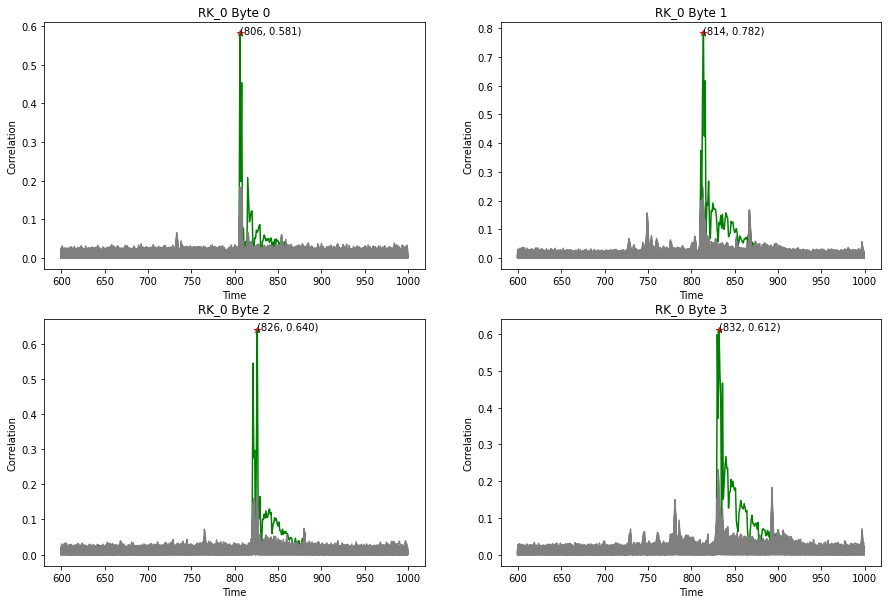

time: 5.41 s (started: 2022-09-02 18:41:01 +00:00)


In [ ]:
get_plots(roundkey_guess = roundkey0_guess, roundkey_printable = roundkey0_printable, roundkey_Rmatrix = roundkey0_Rmatrix, startTime = 600, endTime = 1000, keyname = "RK_0")

# RK1

In [ ]:
## With CPA
roundkey1_guess, roundkey1_Rmatrix, roundkey1_printable = getroundkey(startTime = 1000, endTime = 1400, text_array = textin_array, extra = 10)

,0,1,2,3
0,6E0.5271118,6B0.7161126,DB0.6181138,7A0.6391144
1,B00.2311119,070.2131124,170.2251134,790.2031144
2,400.2051119,CD0.1841126,CE0.1961134,7F0.1611142
3,3F0.2001119,490.1731126,F70.1921134,460.1601144
4,700.1821119,390.1681124,2E0.1861134,330.1561142


time: 14min 39s (started: 2022-09-02 18:23:36 +00:00)


In [ ]:
## With DOM
roundkey1_guess2, roundkey1_MeanDiffs, roundkey1_printable2 = getroundkey_DOM_HW(startTime = 1000, endTime = 1400, text_array = textin_array, extra = 10)

,0,1,2,3
0,6E0.013,6B0.029,DB0.013,7A0.018
1,B00.009,D20.009,870.010,C30.008
2,9F0.007,CD0.009,170.009,E50.008
3,E50.007,EC0.008,2E0.009,E20.007
4,400.007,BC0.008,CE0.009,9F0.006


time: 2min 20s (started: 2022-09-03 09:35:56 +05:30)


In [ ]:
print(roundkey1_guess)      # [110, 107, 219, 122]

[110, 107, 219, 122]
time: 2.35 ms (started: 2022-09-02 18:39:16 +00:00)


In [ ]:
pickle.dump(roundkey1_guess, open('/content/drive/MyDrive/SPM/A2/pickle_files/roundkey1_guess.pkl', 'wb'))
pickle.dump(roundkey1_Rmatrix, open('/content/drive/MyDrive/SPM/A2/pickle_files/roundkey1_Rmatrix.pkl', 'wb'))
pickle.dump(roundkey1_printable, open('/content/drive/MyDrive/SPM/A2/pickle_files/roundkey1_printable.pkl', 'wb'))

time: 1.6 s (started: 2022-09-02 18:39:22 +00:00)


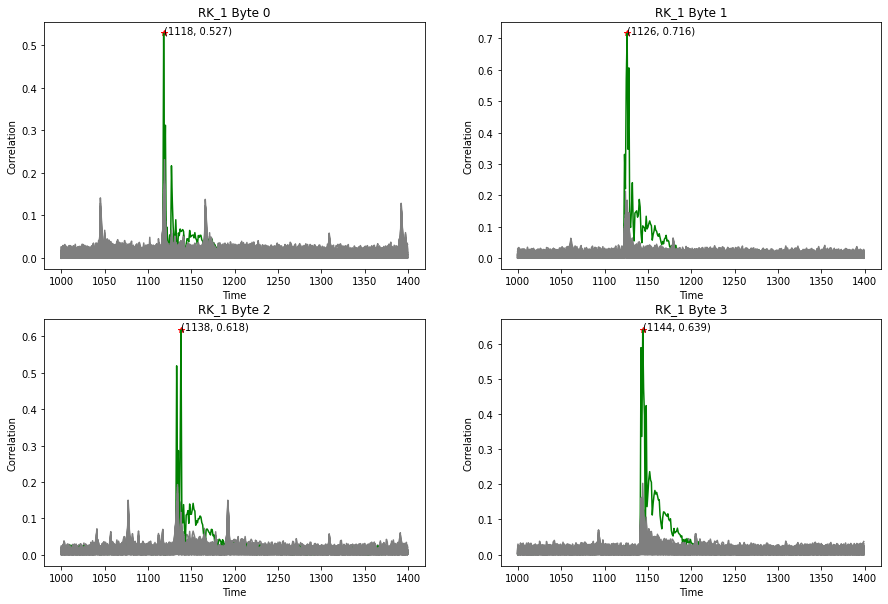

time: 6.05 s (started: 2022-09-02 18:41:47 +00:00)


In [ ]:
get_plots(roundkey_guess = roundkey1_guess, roundkey_printable = roundkey1_printable, roundkey_Rmatrix = roundkey1_Rmatrix, startTime = 1000, endTime = 1400, keyname = "RK_1")

# RK34

In [ ]:
## With CPA
roundkey34_guess, roundkey34_Rmatrix, roundkey34_printable = getroundkey(startTime = 15600, endTime = 16000, text_array = textout_array, extra = 0)

,0,1,2,3
0,BB0.59315817,790.79315825,700.66915837,2A0.61515843
1,B80.17715819,BE0.27415822,730.19415833,330.21215842
2,A10.17315818,400.25115824,6C0.14915837,130.18915842
3,7C0.16715817,700.22715824,4C0.14615837,FF0.18915841
4,FB0.16415818,A80.22615824,B70.14615832,D30.18615842


time: 13min 44s (started: 2022-09-02 18:43:42 +00:00)


In [ ]:
roundkey34_guess2, roundkey34_MeanDiffs, roundkey34_printable2 = getroundkey_DOM_HW(startTime = 15600, endTime = 16000, text_array = textout_array, extra = 0)

,0,1,2,3
0,BB0.016,790.030,700.014,2A0.015
1,390.006,A80.010,730.007,FB0.009
2,B80.005,060.009,AB0.006,330.009
3,D30.005,750.009,230.006,BC0.008
4,AF0.005,700.009,A70.006,030.008


time: 2min 19s (started: 2022-09-03 09:52:36 +05:30)


In [ ]:
print(roundkey34_guess)     # [187, 121, 112, 42]

[187, 121, 112, 42]
time: 2.68 ms (started: 2022-09-02 18:58:14 +00:00)


In [ ]:
pickle.dump(roundkey34_guess, open('/content/drive/MyDrive/SPM/A2/pickle_files/roundkey34_guess.pkl', 'wb'))
pickle.dump(roundkey34_Rmatrix, open('/content/drive/MyDrive/SPM/A2/pickle_files/roundkey34_Rmatrix.pkl', 'wb'))
pickle.dump(roundkey34_printable, open('/content/drive/MyDrive/SPM/A2/pickle_files/roundkey34_printable.pkl', 'wb'))

time: 1.51 s (started: 2022-09-02 18:58:17 +00:00)


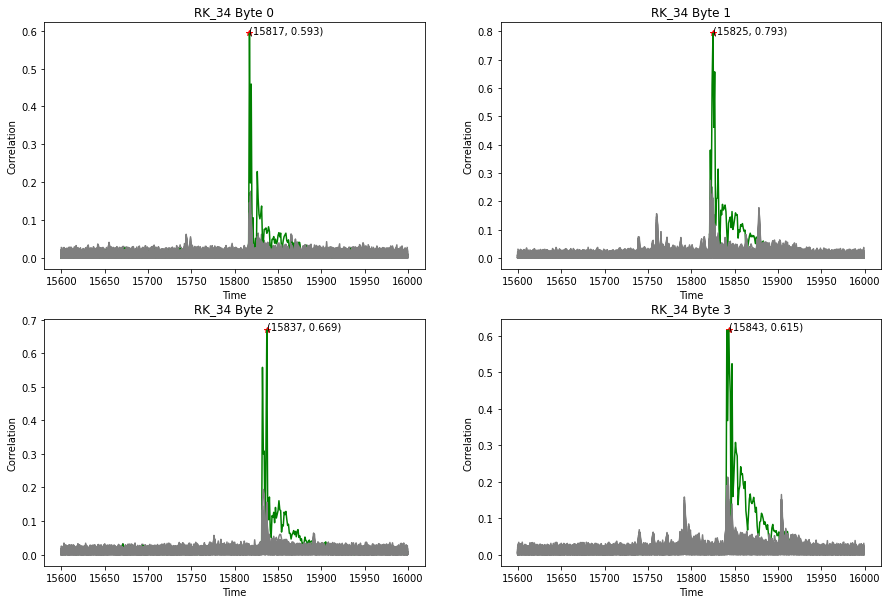

time: 6.19 s (started: 2022-09-02 18:58:22 +00:00)


In [ ]:
get_plots(roundkey_guess = roundkey34_guess, roundkey_printable = roundkey34_printable, roundkey_Rmatrix = roundkey34_Rmatrix, startTime = 15600, endTime = 16000, keyname = "RK_34")

# RK35

In [ ]:
## With CPA
roundkey35_guess, roundkey35_Rmatrix, roundkey35_printable = getroundkey(startTime = 16000, endTime = 16400, text_array = textout_array, extra = 10)

,0,1,2,3
0,B30.54316129,680.73216137,BD0.66416149,410.65216155
1,6D0.21316130,040.21516135,710.21016145,420.19416155
2,E20.20116130,CE0.19516137,480.19316145,440.17616153
3,9D0.19616130,4A0.19016137,910.18616145,7D0.16216155
4,2D0.18416130,980.16716137,A80.18616145,F50.16016155


time: 11min 25s (started: 2022-09-02 19:00:14 +00:00)


In [ ]:
## With DOM
roundkey35_guess2, roundkey35_MeanDiffs, roundkey35_printable2 = getroundkey_DOM_HW(startTime = 16000, endTime = 16400, text_array = textout_array, extra = 10)

,0,1,2,3
0,B30.013,680.029,BD0.012,410.018
1,6D0.008,D10.009,710.009,F80.009
2,420.007,CE0.009,910.009,DE0.008
3,380.007,4A0.008,210.009,D90.006
4,520.007,BF0.008,A80.008,9D0.006


time: 3min 3s (started: 2022-09-03 10:15:30 +05:30)


In [ ]:
print(roundkey35_guess)     # [179, 104, 189, 65]

[179, 104, 189, 65]
time: 1.02 ms (started: 2022-09-02 19:12:06 +00:00)


In [ ]:
pickle.dump(roundkey35_guess, open('/content/drive/MyDrive/SPM/A2/pickle_files/roundkey35_guess.pkl', 'wb'))
pickle.dump(roundkey35_Rmatrix, open('/content/drive/MyDrive/SPM/A2/pickle_files/roundkey35_Rmatrix.pkl', 'wb'))
pickle.dump(roundkey35_printable, open('/content/drive/MyDrive/SPM/A2/pickle_files/roundkey35_printable.pkl', 'wb'))

time: 1.42 s (started: 2022-09-02 19:12:12 +00:00)


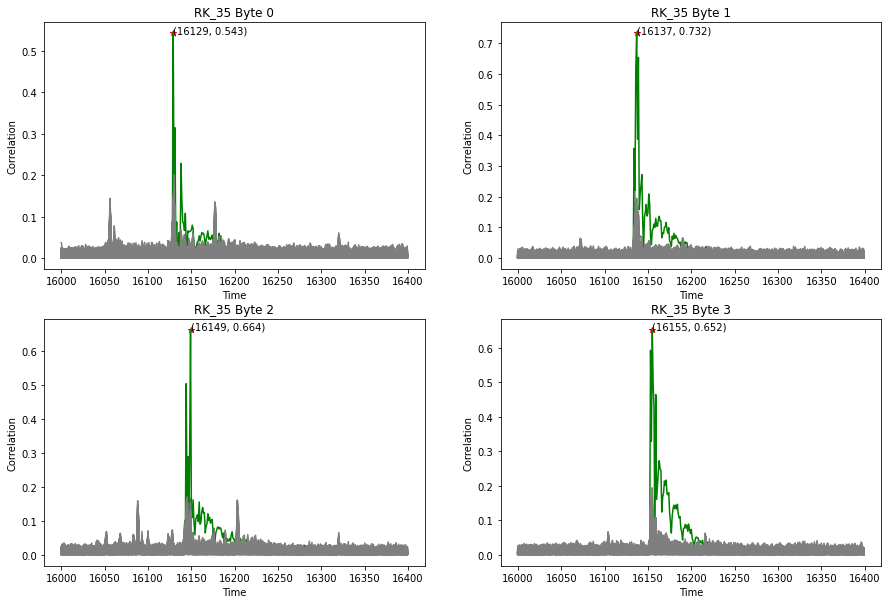

time: 4.83 s (started: 2022-09-02 19:12:23 +00:00)


In [ ]:
get_plots(roundkey_guess = roundkey35_guess, roundkey_printable = roundkey35_printable, roundkey_Rmatrix = roundkey35_Rmatrix, startTime = 16000, endTime = 16400, keyname = "RK_35")

# Whitened keys of Round 2

Second Round Encryption can be seen as follows: 

$F_0(\ F_0(\ P_0,\ RK_{0})\ \oplus\ P_1\ \oplus\ WK_{0} , \ RK_{2})$ \\

$F_1(\ F_1(\ P_2,\ RK_{1})\ \oplus\ P_3\ \oplus\ WK_{1} , \ RK_{3})$ \\

So we are required to use a different intermediate function. We have defined two such functions for each roundkey of the round.

In [ ]:
def intermediate1(pt, rk, kguess, tno):
    net_t_value = t_table(0, pt[0] ^ rk[0]) ^ t_table(1, pt[1] ^ rk[1]) ^ t_table(2, pt[2] ^ rk[2]) ^ t_table(3, pt[3] ^ rk[3])
    if tno == 0:
        return t_table(tno, ((net_t_value >> 24) & 0xFF) ^ pt[4] ^ kguess)
    if tno == 1:
        return t_table(tno, ((net_t_value >> 16) & 0xFF) ^ pt[5] ^ kguess)
    if tno == 2:
        return t_table(tno, ((net_t_value >> 8) & 0xFF) ^ pt[6] ^ kguess)
    if tno == 3:
        return t_table(tno, ((net_t_value >> 0) & 0xFF) ^ pt[7] ^ kguess)

time: 5.14 ms (started: 2022-09-06 05:41:33 +00:00)


In [ ]:
def intermediate2(pt, rk, kguess, tno):
    net_t_value = t_table(10, pt[8] ^ rk[0]) ^ t_table(11, pt[9] ^ rk[1]) ^ t_table(12, pt[10] ^ rk[2]) ^ t_table(13, pt[11] ^ rk[3])
    if tno == 10:
        return t_table(tno, ((net_t_value >> 24) & 0xFF) ^ pt[12] ^ kguess)
    if tno == 11:
        return t_table(tno, ((net_t_value >> 16) & 0xFF) ^ pt[13] ^ kguess)
    if tno == 12:
        return t_table(tno, ((net_t_value >> 8) & 0xFF) ^ pt[14] ^ kguess)
    if tno == 13:
        return t_table(tno, ((net_t_value >> 0) & 0xFF) ^ pt[15] ^ kguess)

time: 4.22 ms (started: 2022-09-06 05:41:34 +00:00)


Defining function to perform CPA with the above intermediate function

In [ ]:
def getXorkey(startTime, endTime, roundkey, extra, intermediatefunc):
    xorkey = []
    numtraces = trace_array.shape[0]
    numpoints = trace_array.shape[1]

    start_point = startTime
    end_point = endTime

    bigR_matrix = np.zeros((4, 256, numpoints))

    # This is the H matrix of size D x K, 
    # D is no. of plaintexts and K is total possible key guesses.
    H_matrix = np.zeros((numtraces, 256), dtype=np.uint8)

    printable = []  # for printing the top guessed keys

    for subkey in tnrange(0, 4, desc="Attacking Subkey"):
        temp = []
        for kguess in tnrange(0, 256, desc="Generating Hamming Weights"):
            for trace_no in range(numtraces):
                iv = intermediatefunc(textin_array[trace_no], roundkey, kguess, subkey + extra)
                H_matrix[trace_no, kguess] = HW(iv)

            for point in range(start_point, end_point):
                hw = H_matrix[:, kguess]
                trc = trace_array[:numtraces, point]
                if (np.var(trc, ddof = 1) == 0):
                    bigR_matrix[subkey, kguess, point] = 0
                else:
                    bigR_matrix[subkey, kguess, point] = np.abs(pearsonr(hw/32, trc)[0])

            temp.append((kguess, np.max(bigR_matrix[subkey, kguess]), np.argmax(bigR_matrix[subkey, kguess])))

        temp.sort(key = lambda x: -x[1])    # sort temp by corr value
        printable.append(temp)
        df = pd.DataFrame(printable).transpose()

        xorkey.append(bigR_matrix[subkey].max(axis=1).argmax())

        clear_output(wait=True) # clears previous output
        display(df.head().style.format(format_stat).apply(color_corr_key, axis=0))
    
    return xorkey, bigR_matrix, printable

time: 7.37 ms (started: 2022-09-06 05:41:35 +00:00)


# $RK_{2}\ \oplus\ WK_{0}$

In [ ]:
## With CPA
first_xorkey_guess, first_xorkey_Rmatrix, first_xorkey_printable = getXorkey(startTime = 1500, endTime = 1800, roundkey = roundkey0_guess, extra = 0, intermediatefunc = intermediate1)

,0,1,2,3
0,870.5731689,F30.7761697,6A0.6321709,670.5961715
1,9D0.1791690,340.2661694,690.1761705,7E0.2401714
2,C70.1741690,CA0.2351696,760.1531709,5E0.1961714
3,840.1731689,220.2161696,AD0.1521704,4B0.1881714
4,400.1731689,FA0.2121696,560.1481709,8A0.1801713


time: 27min 29s (started: 2022-09-02 19:14:25 +00:00)


In [ ]:
## With DOM
first_xorkey_guess2, first_xorkey_MeanDiffs, first_xorkey_printable2 = getXorkey_DOM_HW(startTime = 1500, endTime = 1800, roundkey = roundkey0_guess, extra = 0, intermediatefunc = intermediate1)

,0,1,2,3
0,870.015,F30.029,6A0.014,670.015
1,B60.005,220.010,690.007,7E0.011
2,050.005,8C0.009,BD0.006,F10.008
3,9D0.005,FF0.009,760.006,B60.008
4,840.005,FA0.009,110.006,6E0.008


time: 11min 16s (started: 2022-09-03 11:13:49 +05:30)


In [ ]:
print(first_xorkey_guess)       # [135, 243, 106, 103]

[135, 243, 106, 103]
time: 1.49 ms (started: 2022-09-02 19:44:02 +00:00)


In [ ]:
pickle.dump(first_xorkey_guess, open('/content/drive/MyDrive/SPM/A2/pickle_files/first_xorkey_guess.pkl', 'wb'))
pickle.dump(first_xorkey_Rmatrix, open('/content/drive/MyDrive/SPM/A2/pickle_files/first_xorkey_Rmatrix.pkl', 'wb'))
pickle.dump(first_xorkey_printable, open('/content/drive/MyDrive/SPM/A2/pickle_files/first_xorkey_printable.pkl', 'wb'))

time: 1.49 s (started: 2022-09-02 19:44:16 +00:00)


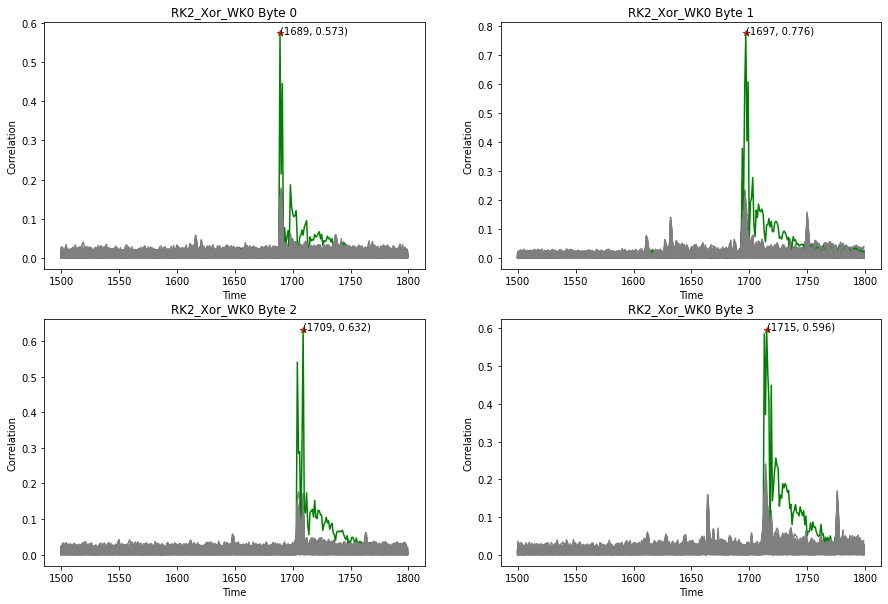

time: 5.56 s (started: 2022-09-02 19:44:19 +00:00)


In [ ]:
get_plots(roundkey_guess = first_xorkey_guess, roundkey_printable = first_xorkey_printable, roundkey_Rmatrix = first_xorkey_Rmatrix, startTime = 1500, endTime = 1800, keyname = "RK2_Xor_WK0")

# $RK_{3}\ \oplus\ WK_{1}$

In [ ]:
## With CPA
second_xorkey_guess, second_xorkey_Rmatrix, second_xorkey_printable = getXorkey(startTime = 1800, endTime = 2250, roundkey = roundkey1_guess, extra = 10, intermediatefunc = intermediate2)

,0,1,2,3
0,C70.5322001,C30.7192009,F10.6252021,A80.6362027
1,190.2022002,AF0.2142007,3D0.2202017,AB0.2142027
2,E90.1942002,650.1822009,040.1872017,940.1772027
3,960.1882002,E10.1722009,E40.1842017,1C0.1652027
4,990.1822002,C80.1612007,DD0.1812017,580.1592027


time: 30min 31s (started: 2022-09-02 19:45:33 +00:00)


In [ ]:
## With DOM
second_xorkey_guess2, second_xorkey_MeanDiffs, second_xorkey_printable2 = getXorkey_DOM_HW(startTime = 1800, endTime = 2250, roundkey = roundkey1_guess, extra = 10, intermediatefunc = intermediate2)

,0,1,2,3
0,C70.014,C30.028,F10.013,A80.018
1,190.008,7A0.009,E40.009,110.008
2,260.007,650.009,3D0.009,370.007
3,360.007,140.008,040.009,740.006
4,E90.007,E10.008,AD0.009,300.006


time: 11min 39s (started: 2022-09-03 11:49:28 +05:30)


In [ ]:
print(second_xorkey_guess)      # [199, 195, 241, 168]

[199, 195, 241, 168]
time: 1.64 ms (started: 2022-09-02 20:17:17 +00:00)


In [ ]:
pickle.dump(second_xorkey_guess, open('/content/drive/MyDrive/SPM/A2/pickle_files/second_xorkey_guess.pkl', 'wb'))
pickle.dump(second_xorkey_Rmatrix, open('/content/drive/MyDrive/SPM/A2/pickle_files/second_xorkey_Rmatrix.pkl', 'wb'))
pickle.dump(second_xorkey_printable, open('/content/drive/MyDrive/SPM/A2/pickle_files/second_xorkey_printable.pkl', 'wb'))

time: 1.22 s (started: 2022-09-02 20:17:20 +00:00)


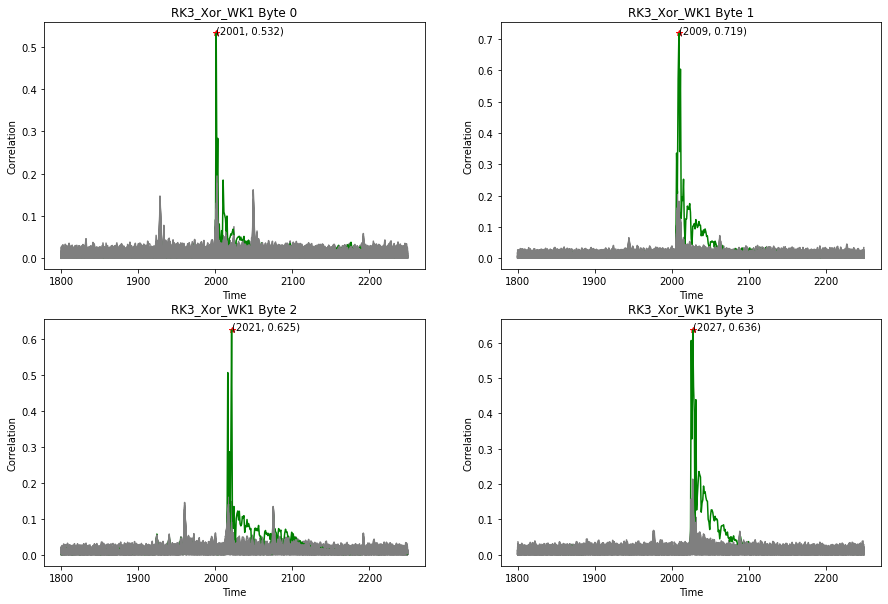

time: 6.32 s (started: 2022-09-02 20:17:45 +00:00)


In [ ]:
get_plots(roundkey_guess = second_xorkey_guess, roundkey_printable = second_xorkey_printable, roundkey_Rmatrix = second_xorkey_Rmatrix, startTime = 1800, endTime = 2250, keyname = "RK3_Xor_WK1")

# Measuring confidence of each key identified

## Num trace plots

In [ ]:
def get_trace_plots_rk(roundkey_guess, roundkey_printable, roundkey, extra):
    numtraces = trace_array.shape[0]
    numpoints = trace_array.shape[1]
    plot_data = np.zeros((4, 256, numtraces))
    H_matrix = np.zeros((4, numtraces, 256), dtype = np.float32)
    for subkey in tnrange(0, 4, desc = "Iterating over subkeys"):
        for kguess in tnrange(0, 256, desc = "Iterating over all keys"):
            for trace_no in range(1, trace_array.shape[0]):
                iv = intermediate(textout_array[trace_no], kguess, subkey + extra)
                H_matrix[subkey, trace_no, kguess] = HW(iv)

                hw = H_matrix[subkey, :(trace_no + 1), kguess]
                trc = trace_array[:(trace_no + 1), roundkey_printable[subkey][0][2]]
                if ((np.var(hw, ddof = 1) == 0) or (np.var(trc, ddof = 1) == 0)):
                    plot_data[subkey, kguess, trace_no] = 0
                else:
                    plot_data[subkey, kguess, trace_no] = pearsonr(hw/32, trc)[0]

        pickle.dump(plot_data[subkey], open(f'/content/drive/MyDrive/SPM/A2/numtraces_plots/{roundkey}_byte{subkey}.pkl', 'wb'))
        color_list = ['tab:gray' for i in range(256)]
        color_list[roundkey_guess[subkey]] = 'g'
        for i in range(256):
            plt.plot(range(len(plot_data[subkey][i])), plot_data[subkey][i], color = color_list[i])
        plt.savefig(f'/content/drive/MyDrive/SPM/A2/plot_images/{roundkey}_byte{subkey}-numtrace.png', bbox_inches='tight')
        plt.show()
    return plot_data

time: 4.12 ms (started: 2022-09-06 08:19:35 +00:00)


### Confidence for RK0 is directly mentioned in the report itself. We couldn't add it here because of colab issues.

## Confidence of RK1

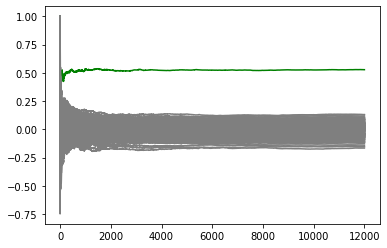

time: 4.73 s (started: 2022-09-04 11:43:54 +00:00)


In [ ]:
color_list = ['tab:gray' for i in range(256)]
color_list[roundkey1_guess[0]] = 'g'
for i in range(256):
    plt.plot(range(len(rk1_plot_data[0][i])), rk1_plot_data[0][i], color = color_list[i])
plt.savefig(f'/content/drive/MyDrive/SPM/A2/plot_images/RK1_byte0-numtrace.png', bbox_inches='tight')
plt.show()

## Confidence of RK34 

In [ ]:
roundkey34_guess = pickle.load(open('/content/drive/MyDrive/SPM/A2/pickle_files/roundkey34_guess.pkl', 'rb'))
roundkey34_printable = pickle.load(open('/content/drive/MyDrive/SPM/A2/pickle_files/roundkey34_printable.pkl', 'rb'))

time: 17.3 ms (started: 2022-09-05 09:22:30 +00:00)


Iterating over subkeys:   0%|          | 0/4 [00:00<?, ?it/s]

Iterating over all keys:   0%|          | 0/256 [00:00<?, ?it/s]

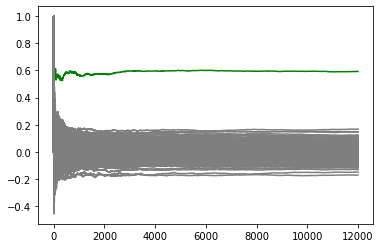

Iterating over all keys:   0%|          | 0/256 [00:00<?, ?it/s]

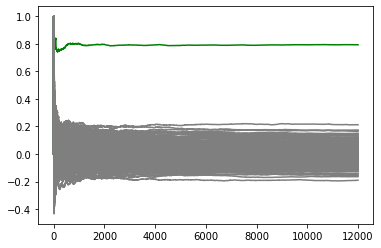

Iterating over all keys:   0%|          | 0/256 [00:00<?, ?it/s]

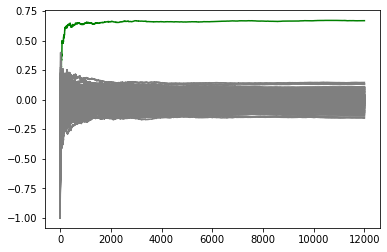

Iterating over all keys:   0%|          | 0/256 [00:00<?, ?it/s]

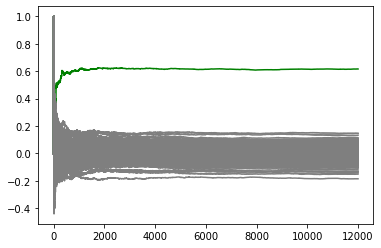

time: 2h 19min 56s (started: 2022-09-05 09:22:32 +00:00)


In [ ]:
rk34_plot_data = get_trace_plots_rk(roundkey_guess = roundkey34_guess, roundkey_printable = roundkey34_printable, roundkey = "RK34", extra = 0)

## Confidence of RK35

In [ ]:
roundkey35_guess = pickle.load(open('/content/drive/MyDrive/SPM/A2/pickle_files/roundkey35_guess.pkl', 'rb'))
roundkey35_printable = pickle.load(open('/content/drive/MyDrive/SPM/A2/pickle_files/roundkey35_printable.pkl', 'rb'))

time: 521 ms (started: 2022-09-06 08:21:49 +00:00)


Iterating over subkeys:   0%|          | 0/4 [00:00<?, ?it/s]

Iterating over all keys:   0%|          | 0/256 [00:00<?, ?it/s]

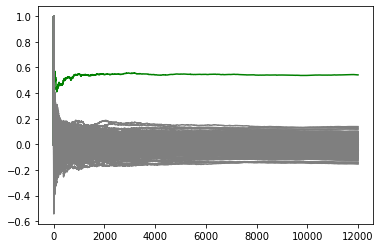

Iterating over all keys:   0%|          | 0/256 [00:00<?, ?it/s]

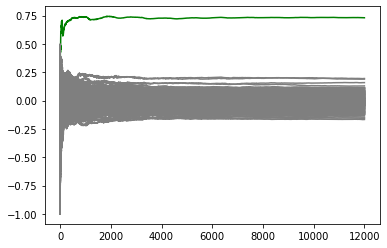

Iterating over all keys:   0%|          | 0/256 [00:00<?, ?it/s]

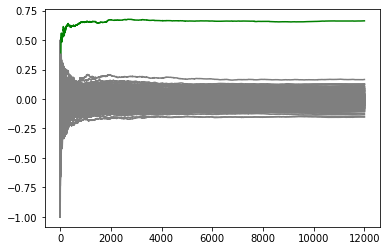

Iterating over all keys:   0%|          | 0/256 [00:00<?, ?it/s]

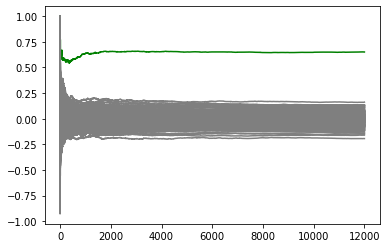

time: 2h 8s (started: 2022-09-06 08:22:24 +00:00)


In [ ]:
rk35_plot_data = get_trace_plots_rk(roundkey_guess = roundkey35_guess, roundkey_printable = roundkey35_printable, roundkey = "RK35", extra = 10)

## Confidence of Whitened Keys

In [ ]:
def get_trace_plots_xk(xorkey_guess, xorkey_printable, xorkey, extra, roundkey):
    numtraces = trace_array.shape[0]
    numpoints = trace_array.shape[1]
    plot_data = np.zeros((4, 256, numtraces))
    H_matrix = np.zeros((4, numtraces, 256), dtype = np.float32)
    for subkey in tnrange(0, 4, desc = "Iterating over subkeys"):
        for kguess in tnrange(0, 256, desc = "Iterating over all keys"):
            for trace_no in range(1, trace_array.shape[0]):
                # iv = intermediate(textout_array[trace_no], kguess, subkey + extra)
                iv = intermediate2(textin_array[trace_no], roundkey, kguess, subkey + extra)
                H_matrix[subkey, trace_no, kguess] = HW(iv)

                hw = H_matrix[subkey, :(trace_no + 1), kguess]
                trc = trace_array[:(trace_no + 1), xorkey_printable[subkey][0][2]]
                if ((np.var(hw, ddof = 1) == 0) or (np.var(trc, ddof = 1) == 0)):
                    plot_data[subkey, kguess, trace_no] = 0
                else:
                    plot_data[subkey, kguess, trace_no] = pearsonr(hw/32, trc)[0]

        pickle.dump(plot_data[subkey], open(f'/content/drive/MyDrive/SPM/A2/numtraces_plots/{xorkey}_byte{subkey}.pkl', 'wb'))
        color_list = ['tab:gray' for i in range(256)]
        color_list[xorkey_guess[subkey]] = 'g'
        for i in range(256):
            plt.plot(range(len(plot_data[subkey][i])), plot_data[subkey][i], color = color_list[i])
        plt.savefig(f'/content/drive/MyDrive/SPM/A2/plot_images/{xorkey}_byte{subkey}-numtrace.png', bbox_inches='tight')
        plt.show()
    return plot_data

time: 6.94 ms (started: 2022-09-06 05:44:46 +00:00)


In [ ]:
first_xorkey_guess = pickle.load(open('/content/drive/MyDrive/SPM/A2/pickle_files/first_xorkey_guess.pkl', 'rb'))
first_xorkey_printable = pickle.load(open('/content/drive/MyDrive/SPM/A2/pickle_files/first_xorkey_printable.pkl', 'rb'))
roundkey0_guess = pickle.load(open('/content/drive/MyDrive/SPM/A2/pickle_files/roundkey0_guess.pkl', 'rb'))

time: 629 ms (started: 2022-09-05 17:12:36 +00:00)


Iterating over subkeys:   0%|          | 0/4 [00:00<?, ?it/s]

Iterating over all keys:   0%|          | 0/256 [00:00<?, ?it/s]

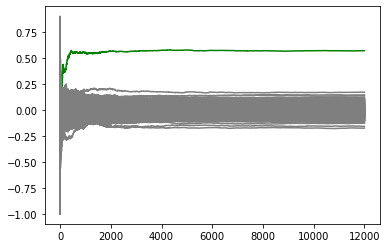

Iterating over all keys:   0%|          | 0/256 [00:00<?, ?it/s]

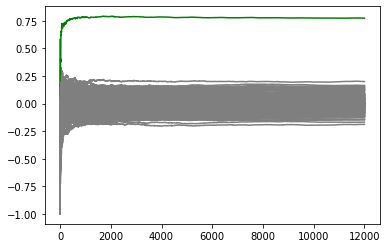

Iterating over all keys:   0%|          | 0/256 [00:00<?, ?it/s]

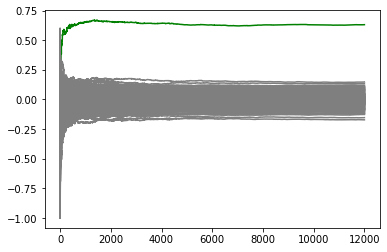

Iterating over all keys:   0%|          | 0/256 [00:00<?, ?it/s]

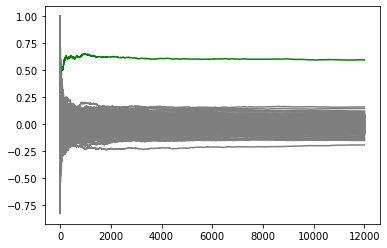

time: 1h 52min 40s (started: 2022-09-05 17:15:11 +00:00)


In [ ]:
first_xorkey_plot_data = get_trace_plots_xk(xorkey_guess = first_xorkey_guess, xorkey_printable = first_xorkey_printable, xorkey = "RK2^WK0", extra = 0, roundkey = roundkey0_guess)

In [ ]:
second_xorkey_guess = pickle.load(open('/content/drive/MyDrive/SPM/A2/pickle_files/second_xorkey_guess.pkl', 'rb'))
second_xorkey_printable = pickle.load(open('/content/drive/MyDrive/SPM/A2/pickle_files/second_xorkey_printable.pkl', 'rb'))
roundkey1_guess = pickle.load(open('/content/drive/MyDrive/SPM/A2/pickle_files/roundkey1_guess.pkl', 'rb'))

time: 12 ms (started: 2022-09-06 05:44:55 +00:00)


Iterating over subkeys:   0%|          | 0/4 [00:00<?, ?it/s]

Iterating over all keys:   0%|          | 0/256 [00:00<?, ?it/s]

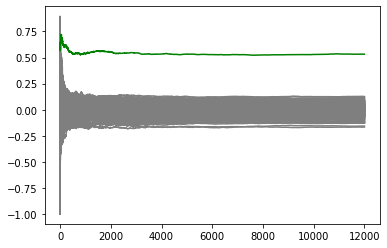

Iterating over all keys:   0%|          | 0/256 [00:00<?, ?it/s]

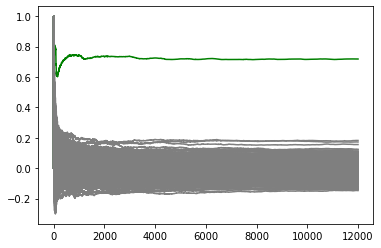

Iterating over all keys:   0%|          | 0/256 [00:00<?, ?it/s]

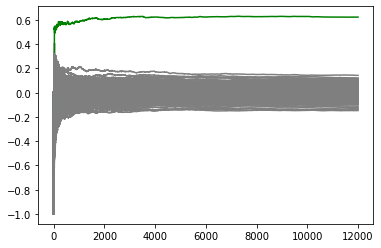

Iterating over all keys:   0%|          | 0/256 [00:00<?, ?it/s]

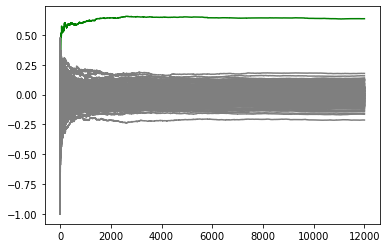

time: 2h 23min 55s (started: 2022-09-06 05:44:57 +00:00)


In [ ]:
second_xorkey_plot_data = get_trace_plots_xk(xorkey_guess = second_xorkey_guess, xorkey_printable = second_xorkey_printable, xorkey = "RK3^WK1", extra = 10, roundkey = roundkey1_guess)

# Conclusion
Thus all keys and sensitive bytes have been identified as required and with high correlation results and appropriate verification with difference of means attack. 